# 12069449

In [1]:
import apollinaire as apn
%matplotlib inline
from astropy.io import fits
from os import path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [8]:
apn.__version__

'1.0'

In [2]:
dr25 = pd.read_csv ('../tables/dr25.csv')
dr25 = dr25.set_index ('KIC')

In [3]:
kic = 12069449

r=dr25.loc[kic, 'Rad']
m=dr25.loc[kic, 'Mass']
teff=dr25.loc[kic, 'Teff']

print (kic, '>>> Teff = {:.0f} K'.format (teff), '---- M = {:.3f} Msun'.format (m), '---- R = {:.3f} Rsun'.format (r))

modDir = path.abspath ('..')
filename = glob.glob (path.join (modDir, 'data/kplr' + str(kic).zfill (9) + '*_COR_filt_inp.fits'))[0]
hdu = fits.open (filename) [0]
data = np.array (hdu.data)
t = data[:,0]
v = data[:,1]

12069449 >>> Teff = 5745 K ---- M = 0.952 Msun ---- R = 1.069 Rsun


Text(0, 0.5, 'Luminosity variation (ppm)')

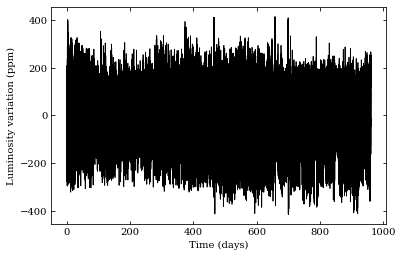

In [4]:
fig, ax = plt.subplots ()
ax.plot (t-t[0], v, color='black')

ax.set_xlabel ('Time (days)')
ax.set_ylabel ('Luminosity variation (ppm)')

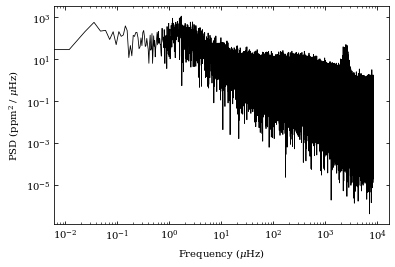

In [5]:
dt = np.median (t[1:] - t[:-1]) * 86400
freq, psd = apn.psd.series_to_psd (v, dt=dt, correct_dc=True)
freq = freq*1e6
psd = psd*1e-6

fig, ax = plt.subplots ()
ax.plot (freq, psd, color='black')
ax.set_xlabel (r'Frequency ($\mu$Hz)')
ax.set_ylabel (r'PSD (ppm$^2$ / $\mu$Hz)')
ax.set_yscale ('log')
ax.set_xscale ('log')

Text(0, 0.5, 'PSD (ppm$^2$ / $\\mu$Hz)')

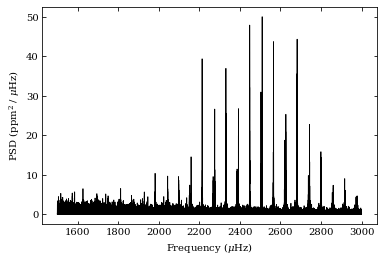

In [6]:
fig, ax = plt.subplots ()
cond = (freq>1500.)&(freq<3000.)
ax.plot (freq[cond], psd[cond], color='black')
ax.set_xlabel (r'Frequency ($\mu$Hz)')
ax.set_ylabel (r'PSD (ppm$^2$ / $\mu$Hz)')

In [7]:
apn.peakbagging.stellar_framework (freq, psd, r, m, teff, n_harvey=2, low_cut=50., filename_back='background',
                                   filemcmc_back='mcmc_background.h5', nsteps_mcmc_back=500, n_order=3, n_order_peakbagging=7, 
                                   filename_pattern='pattern', fit_l3=True, nwalkers=500, 
                                   filemcmc_pattern='mcmc_pattern.h5', nsteps_mcmc_pattern=500, parallelise=True, 
                                   quickfit=True, num=500, discard_pkb=200, discard_pattern=250,
                                   progress=True, a2z_file='modes_param.a2z', epsilon=0.961,
                                   nsteps_mcmc_peakbagging=1000, filename_peakbagging='summary_peakbagging.pdf',
                                   fit_splittings=True, fit_angle=True, fit_amp=True)

Dnu computed with scale law: 119.2 muHz
numax computed with scale law: 2546.4 muHz
Background model likelihood minimisation:
Optimization terminated successfully.
mcmc_background.h5 already exists, existing chains set to 'read', no sampling has been performed, proceeding to next step.
Global pattern likelihood minimisation:
Optimization terminated successfully.
mcmc_pattern.h5 already exists, existing chains set to 'read', no sampling has been performed, proceeding to next step.
Orders to fit
[17 18 19 20 21 22 23]
Fitting on order 17
Window width: 103.3 muHz
Chain will be saved at: ./mcmc_sampler_order_17.h5


  0%|          | 0/1000 [00:00<?, ?it/s]/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  0%|          | 0/1000 [00:00<?, ?it/s]

Ensemble sampling achieved
Fitting on order 18
Window width: 103.2 muHz
Chain will be saved at: ./mcmc_sampler_order_18.h5


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  0%|          | 0/1000 [00:00<?, ?it/s]

Ensemble sampling achieved
Fitting on order 19
Window width: 103.2 muHz
Chain will be saved at: ./mcmc_sampler_order_19.h5


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  0%|          | 0/1000 [00:00<?, ?it/s]

Ensemble sampling achieved
Fitting on order 20
Window width: 103.1 muHz
Chain will be saved at: ./mcmc_sampler_order_20.h5


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  0%|          | 0/1000 [00:00<?, ?it/s]

Ensemble sampling achieved
Fitting on order 21
Window width: 103.0 muHz
Chain will be saved at: ./mcmc_sampler_order_21.h5


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  0%|          | 0/1000 [00:00<?, ?it/s]

Ensemble sampling achieved
Fitting on order 22
Window width: 102.9 muHz
Chain will be saved at: ./mcmc_sampler_order_22.h5


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  0%|          | 0/1000 [00:00<?, ?it/s]

Ensemble sampling achieved
Fitting on order 23
Window width: 102.8 muHz
Chain will be saved at: ./mcmc_sampler_order_23.h5


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [05:15<00:00,  3.17it/s]


Ensemble sampling achieved
